In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


IRS SOI (Statistics of Income) dept here: https://www.irs.gov/uac/soi-tax-stats-individual-income-tax-statistics-zip-code-data-soi - (Note: this is 2013 data). 

I cleaned and extracted data from Pittsburgh, PA for the purpose of analyzing income levels among different districts based on zipcode.

In [6]:
data = pd.read_excel("IRS_Income_PA.xlsx")
data.head()

,STATE,ZIPCODE,Number of returns,Adjusted gross income (AGI),Avg AGI,Number of returns with total income,Total income amount,Avg total income,Number of returns with taxable income,Taxable income amount,Avg taxable income
0,PA,0,6079230,370575313,60.957607,6079240,375921146,61.836865,4686920,258627513,55.180697
1,PA,15001,16590,833198,50.222905,16590,842790,50.801085,12580,562265,44.695151
2,PA,15003,5770,228194,39.548354,5770,230824,40.004159,4280,142799,33.364252
3,PA,15005,4970,346703,69.759155,4970,351172,70.658350,3940,255254,64.785279
4,PA,15007,210,9987,47.557143,210,10103,48.109524,160,6726,42.037500


In [7]:
data.shape #there are approximately 1367 different zipcodes in Pittsburgh

(1367, 11)

Sort data based on the average total income in descending order

In [24]:
sorted_by_gross = data.sort_values(['Avg total income'], ascending=False) 

In [32]:
sorted_by_gross = data[['ZIPCODE', 'Avg total income']]

sorted_by_gross.sort_values(['Avg total income'], ascending=False) 


,ZIPCODE,Avg total income
1191,19035,689.550495
1223,19085,398.870863
77,15142,336.128972
1326,19477,302.082353
1195,19041,298.586288
1172,19010,241.913170
1210,19066,235.084462
1149,18938,226.823891
1279,19312,212.571979
1225,19087,196.314194


In [33]:
sorted_by_gross.describe()

,ZIPCODE,Avg total income
count,1367.000000,1367.000000
mean,17236.125823,55.975417
std,2669.766213,33.479732
min,0.000000,18.756250
25%,15947.500000,42.080860
50%,17068.000000,48.319565
75%,18414.500000,57.950781
max,99999.000000,689.550495


In [35]:
inc = sorted_by_gross[sorted_by_gross["Avg total income"]< 689.550495]
inc2 = inc[inc["Avg total income"]>= 57.950781]
print(len(inc2))

341


Group data from 'ZIPCODE' and 'Avg total income'

In [11]:
zip_avgIncome = data[['ZIPCODE', 'Avg total income']]
zip_avgIncome.head()


,ZIPCODE,Avg total income
0,0,61.836865
1,15001,50.801085
2,15003,40.004159
3,15005,70.658350
4,15007,48.109524


Use 'ZIPCODE' as index for the pivot table

In [12]:
AvgIncome_by_Zipcode = zip_avgIncome.pivot_table(index=['ZIPCODE'])
AvgIncome_by_Zipcode.head()

,Avg total income
ZIPCODE,
0,61.836865
15001,50.801085
15003,40.004159
15005,70.658350
15007,48.109524


In [13]:
sorted_tab = AvgIncome_by_Zipcode.sort_values(['ZIPCODE'], ascending=False)
#sorted_tab

Get rid of zipcode outlier ('0' and '99999')

In [14]:
regular_sorted_tab = sorted_tab.iloc[1:1366,]
#regular_sorted_tab

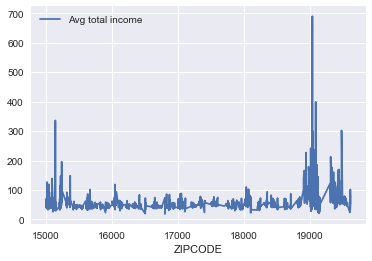

In [15]:
regular_sorted_tab.plot()
plt.show()

Based on the graph above, I divided the data frame into 5 zipcode categories according to income levels

In [16]:
seg = regular_sorted_tab.reset_index()
#seg

In [22]:
seg["ZIPCODE"] = seg["ZIPCODE"].astype(int)

In [23]:
seg1 = seg[seg["ZIPCODE"]< 15300]
#seg1
#seg1 = seg[seg["ZIPCODE"]>= 15000]
print(len(seg5))

267


In [75]:
seg2 = seg[seg["ZIPCODE"]< 17700]
seg2 = seg2[seg2["ZIPCODE"]>= 15300]
seg2

,ZIPCODE,Avg total income
536,17603,50.285283
537,17602,45.432911
538,17601,74.512538
539,17584,60.690578
540,17582,60.325490
541,17581,49.744828
542,17579,57.726087
543,17578,56.198377
544,17576,43.540000
545,17572,44.337349


In [76]:
seg3 = seg[seg["ZIPCODE"]< 18200]
seg3 = seg3[seg3["ZIPCODE"]>= 17700]
seg3

,ZIPCODE,Avg total income
394,18109,33.257079
395,18106,75.620937
396,18104,70.655985
397,18103,54.236043
398,18102,24.095700
399,18101,22.503521
400,18092,80.712179
401,18091,57.990604
402,18088,55.390443
403,18087,47.802273


In [ ]:
seg4 = seg[seg["ZIPCODE"]< 18700]
seg4 = seg[seg["ZIPCODE"]>= 18200]
seg4

In [20]:
seg5 = seg[seg["ZIPCODE"]<= 19500]
seg5 = seg[seg["ZIPCODE"]>= 18700]
#seg5
print(len(seg5))

267


In [34]:
cats = pd.qcut(regular_sorted_tab['Avg total income'], 4, precision=2)  # Cut into quartiles
cats.head()

ZIPCODE
19611     (18.75, 42.07]
19610    (57.95, 689.55]
19609      (48.3, 57.95]
19608    (57.95, 689.55]
19607      (48.3, 57.95]
Name: Avg total income, dtype: category
Categories (4, interval[float64]): [(18.75, 42.07] < (42.07, 48.3] < (48.3, 57.95] < (57.95, 689.55]]

In [35]:
pd.value_counts(cats)

(18.75, 42.07]     342
(57.95, 689.55]    341
(48.3, 57.95]      341
(42.07, 48.3]      341
Name: Avg total income, dtype: int64

In [29]:
sorted_by_avg = regular_sorted_tab.sort_values(['Avg total income'], ascending=False)
sorted_by_avg.head()

,Avg total income
ZIPCODE,
19035,689.550495
19085,398.870863
15142,336.128972
19477,302.082353
19041,298.586288


In [54]:
sorted_by_avg.describe()

,Avg total income
count,1365.000000
mean,55.973317
std,33.503794
min,18.756250
25%,42.074000
50%,48.300000
75%,57.950575
max,689.550495


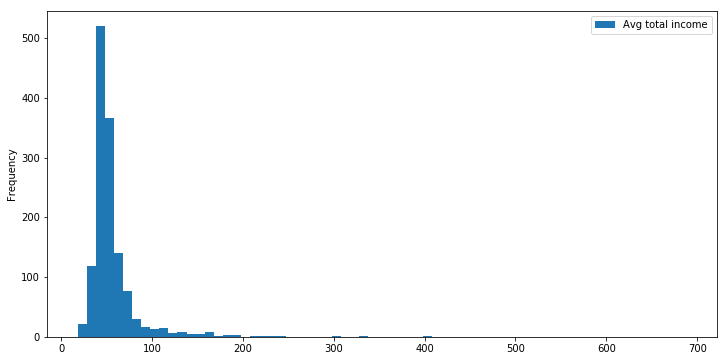

In [58]:
bin_values = np.arange(start=18, stop=690, step=10)
sorted_by_avg.plot(kind='hist', bins=bin_values, figsize=[12,6], alpha=.4, legend=True) 